#    Predictive Modelling Using Social Profile in Online P2P Lending Market

## Problem Statement

The online peer-to-peer (P2P) lending market has witnessed rapid growth, offering an alternative lending platform for borrowers and investors. However, one of the critical challenges faced by P2P lending platforms is the accurate assessment of credit risk. Traditional credit scoring models may fall short in capturing the nuanced financial behavior of individuals in the digital era.

Financial Factors:
        -Credit Score
        -Income Level
        -Employment Status
        -Debt-to-Income Ratio
        -Loan Amount Requested
        -Previous Loan History
        -Monthly Expenses

Social Factors:
        -Number of Positive Social Endorsements
        -Strength of Social Connections
        -Frequency of Positive Interactions on Social Media
        -Participation in Financial or Community Groups
        -Consistency in Profile Information
        -Privacy Settings and Sensitivity to Sharing Personal Information
        -Sentiment Analysis of Financial-Related Social Media Posts
        -Diversity of Social Network (Demographic and Geographic)

By combining these financial and social factors, the predictive modeling project aims to create a more holistic and nuanced understanding of the borrower's creditworthiness. Machine learning algorithms can then be applied to this integrated dataset to develop a predictive model that considers both financial and social features for accurate credit risk assessment in the online P2P lending market.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [3]:
loan_df = pd.read_csv("prosperLoanData.csv")
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
loan_df.shape

(113937, 81)

In [7]:
loan_df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [8]:

loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


## Data Cleaning

In [10]:
date_columns = ['DateCreditPulled','ClosedDate','FirstRecordedCreditLine']
for column in date_columns:
    loan_df[column] = pd.to_datetime(loan_df[column])

In [16]:
X = loan_df.select_dtypes(include=[object])
X.columns


Index(['ListingKey', 'ListingCreationDate', 'CreditGrade', 'LoanStatus',
       'ProsperRating (Alpha)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'GroupKey', 'IncomeRange', 'LoanKey',
       'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey'],
      dtype='object')

In [17]:
a = loan_df.select_dtypes(exclude=[object])
a.columns

Index(['ListingNumber', 'Term', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperScore',
       'ListingCategory (numeric)', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'DateCreditPulled',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeVerifiable', 'StatedMonthl

In [18]:
columns_drop = ['ListingKey','ListingCreationDate','LoanOriginationDate','EstimatedEffectiveYield','EstimatedLoss',
                'EstimatedReturn','ProsperRating (numeric)','ListingNumber','LoanKey','MemberKey','LoanNumber']
loan_df.drop(columns_drop,axis=1,inplace=True)

### Handling Missing values

In [24]:
for e in loan_df.columns:

    print(e,loan_df[e].isnull().sum())

CreditGrade 84984
Term 0
LoanStatus 0
ClosedDate 58848
BorrowerAPR 25
BorrowerRate 0
LenderYield 0
ProsperRating (Alpha) 29084
ProsperScore 29084
ListingCategory (numeric) 0
BorrowerState 5515
Occupation 3588
EmploymentStatus 2255
EmploymentStatusDuration 7625
IsBorrowerHomeowner 0
CurrentlyInGroup 0
GroupKey 100596
DateCreditPulled 0
CreditScoreRangeLower 591
CreditScoreRangeUpper 591
FirstRecordedCreditLine 697
CurrentCreditLines 7604
OpenCreditLines 7604
TotalCreditLinespast7years 697
OpenRevolvingAccounts 0
OpenRevolvingMonthlyPayment 0
InquiriesLast6Months 697
TotalInquiries 1159
CurrentDelinquencies 697
AmountDelinquent 7622
DelinquenciesLast7Years 990
PublicRecordsLast10Years 697
PublicRecordsLast12Months 7604
RevolvingCreditBalance 7604
BankcardUtilization 7604
AvailableBankcardCredit 7544
TotalTrades 7544
TradesNeverDelinquent (percentage) 7544
TradesOpenedLast6Months 7544
DebtToIncomeRatio 8554
IncomeRange 0
IncomeVerifiable 0
StatedMonthlyIncome 0
TotalProsperLoans 91852
Tot

In [25]:
too_nan=['CreditGrade',
 'GroupKey',
 'TotalProsperLoans',
 'TotalProsperPaymentsBilled',
 'OnTimeProsperPayments',
 'ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate',
 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding',
 'ScorexChangeAtTimeOfListing',
 'LoanFirstDefaultedCycleNumber']

In [26]:

for i in too_nan:
    loan_df = loan_df.drop(i, axis=1)

print(loan_df.shape)

(113937, 59)


In [27]:
numeric_cols = loan_df.select_dtypes(include=['float64', 'int64']).columns
loan_df[numeric_cols] = loan_df[numeric_cols].fillna(loan_df[numeric_cols].mean())
categorical_cols = loan_df.select_dtypes(include=['object']).columns
loan_df[categorical_cols] = loan_df[categorical_cols].fillna(loan_df[categorical_cols].mode().iloc[0])
loan_df['FirstRecordedCreditLine'].fillna(loan_df['FirstRecordedCreditLine'].mean(), inplace=True)

In [28]:
for column in loan_df:
    print(column, ':', loan_df[column].isnull().sum())

Term : 0
LoanStatus : 0
ClosedDate : 58848
BorrowerAPR : 0
BorrowerRate : 0
LenderYield : 0
ProsperRating (Alpha) : 0
ProsperScore : 0
ListingCategory (numeric) : 0
BorrowerState : 0
Occupation : 0
EmploymentStatus : 0
EmploymentStatusDuration : 0
IsBorrowerHomeowner : 0
CurrentlyInGroup : 0
DateCreditPulled : 0
CreditScoreRangeLower : 0
CreditScoreRangeUpper : 0
FirstRecordedCreditLine : 0
CurrentCreditLines : 0
OpenCreditLines : 0
TotalCreditLinespast7years : 0
OpenRevolvingAccounts : 0
OpenRevolvingMonthlyPayment : 0
InquiriesLast6Months : 0
TotalInquiries : 0
CurrentDelinquencies : 0
AmountDelinquent : 0
DelinquenciesLast7Years : 0
PublicRecordsLast10Years : 0
PublicRecordsLast12Months : 0
RevolvingCreditBalance : 0
BankcardUtilization : 0
AvailableBankcardCredit : 0
TotalTrades : 0
TradesNeverDelinquent (percentage) : 0
TradesOpenedLast6Months : 0
DebtToIncomeRatio : 0
IncomeRange : 0
IncomeVerifiable : 0
StatedMonthlyIncome : 0
LoanCurrentDaysDelinquent : 0
LoanMonthsSinceOrigina

In [29]:
loan_df.ClosedDate.fillna(value='Not Closed', inplace=True)

In [30]:
loan_df.head()

,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,C,5.950067,0,CO,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,36,Current,Not Closed,0.12016,0.0920,0.0820,A,7.000000,2,CO,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,C,5.950067,0,GA,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,36,Current,Not Closed,0.12528,0.0974,0.0874,A,9.000000,16,GA,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,36,Current,Not Closed,0.24614,0.2085,0.1985,D,4.000000,2,MN,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [31]:
loan_df.duplicated().sum()

0

### Handling Outliers

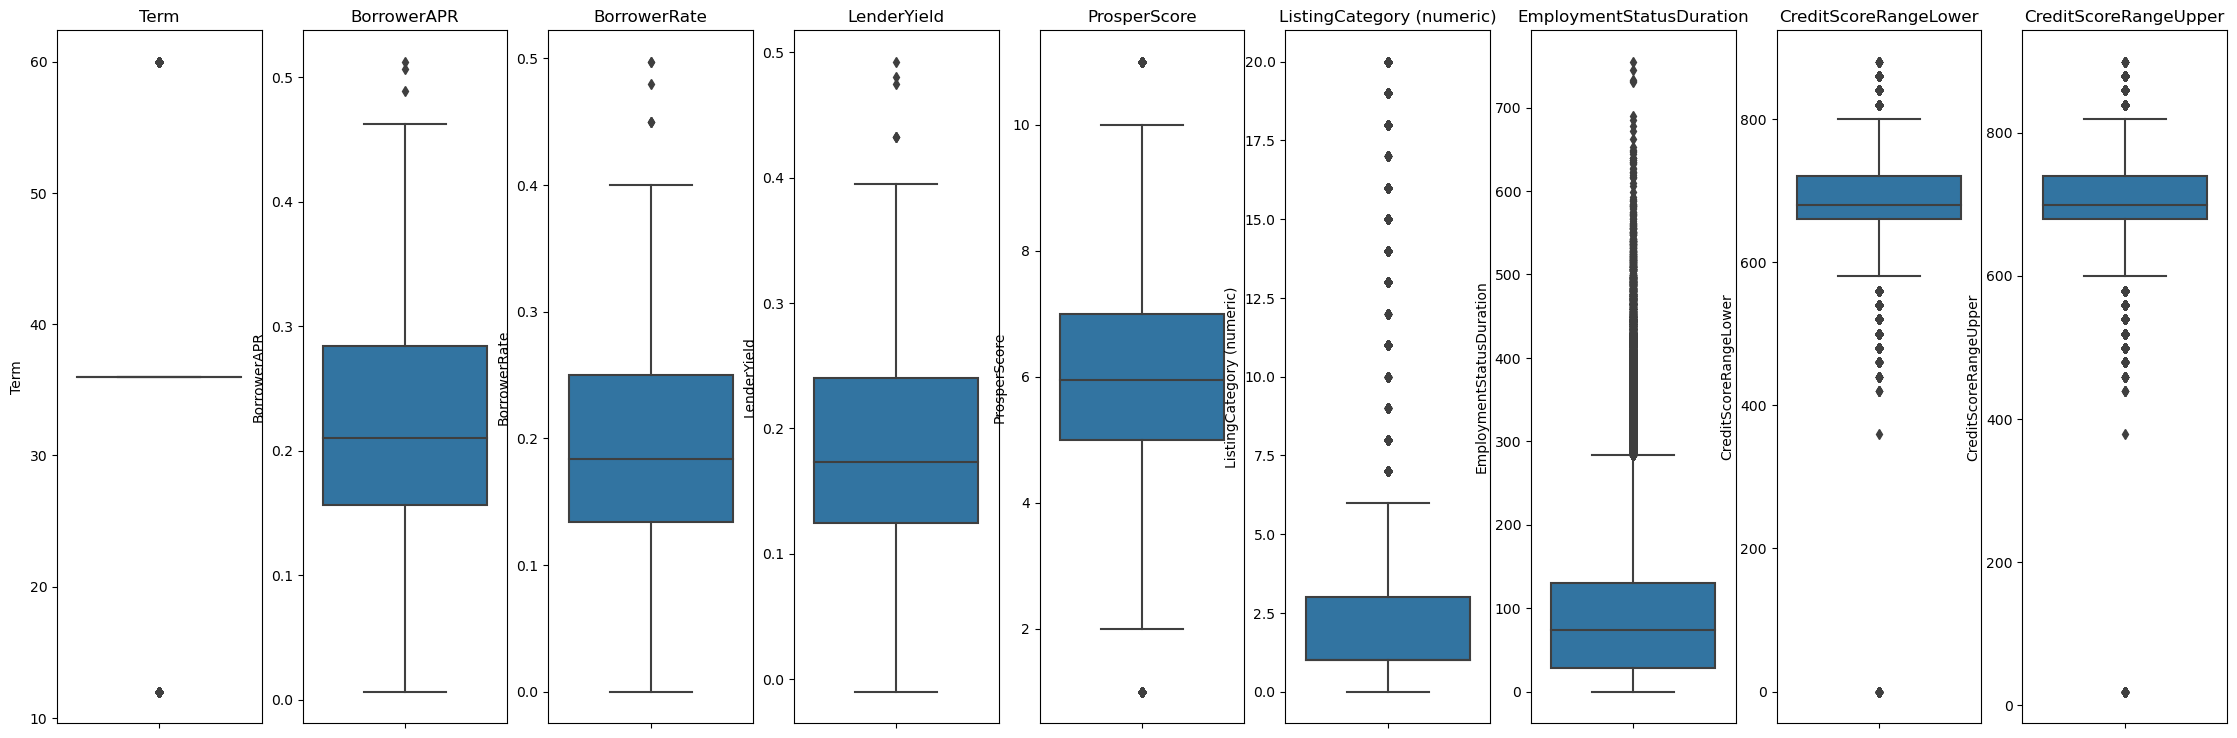

In [34]:
X = loan_df.select_dtypes(include=['number'])
fig, axes = plt.subplots(1, 9, figsize=(28, 9))  

for i, col in enumerate(X.columns[:9]):
    sns.boxplot(data=loan_df, y=col, ax=axes[i])
    axes[i].set_title(col)

plt.show()

In [48]:
for feature in loan_df.columns:
    if loan_df[feature].dtype in ['int64', 'float64']:
        Q1 = loan_df[feature].quantile(0.25)
        Q3 = loan_df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_extrem = Q1 - 1.5 * IQR
        upper_extrem = Q3 + 1.5 * IQR
        mean = loan_df[feature].mean()
        
        # Identify and replace outliers
        loan_df.loc[loan_df[feature] < lower_extrem, feature] = mean
        loan_df.loc[loan_df[feature] > upper_extrem, feature] = mean

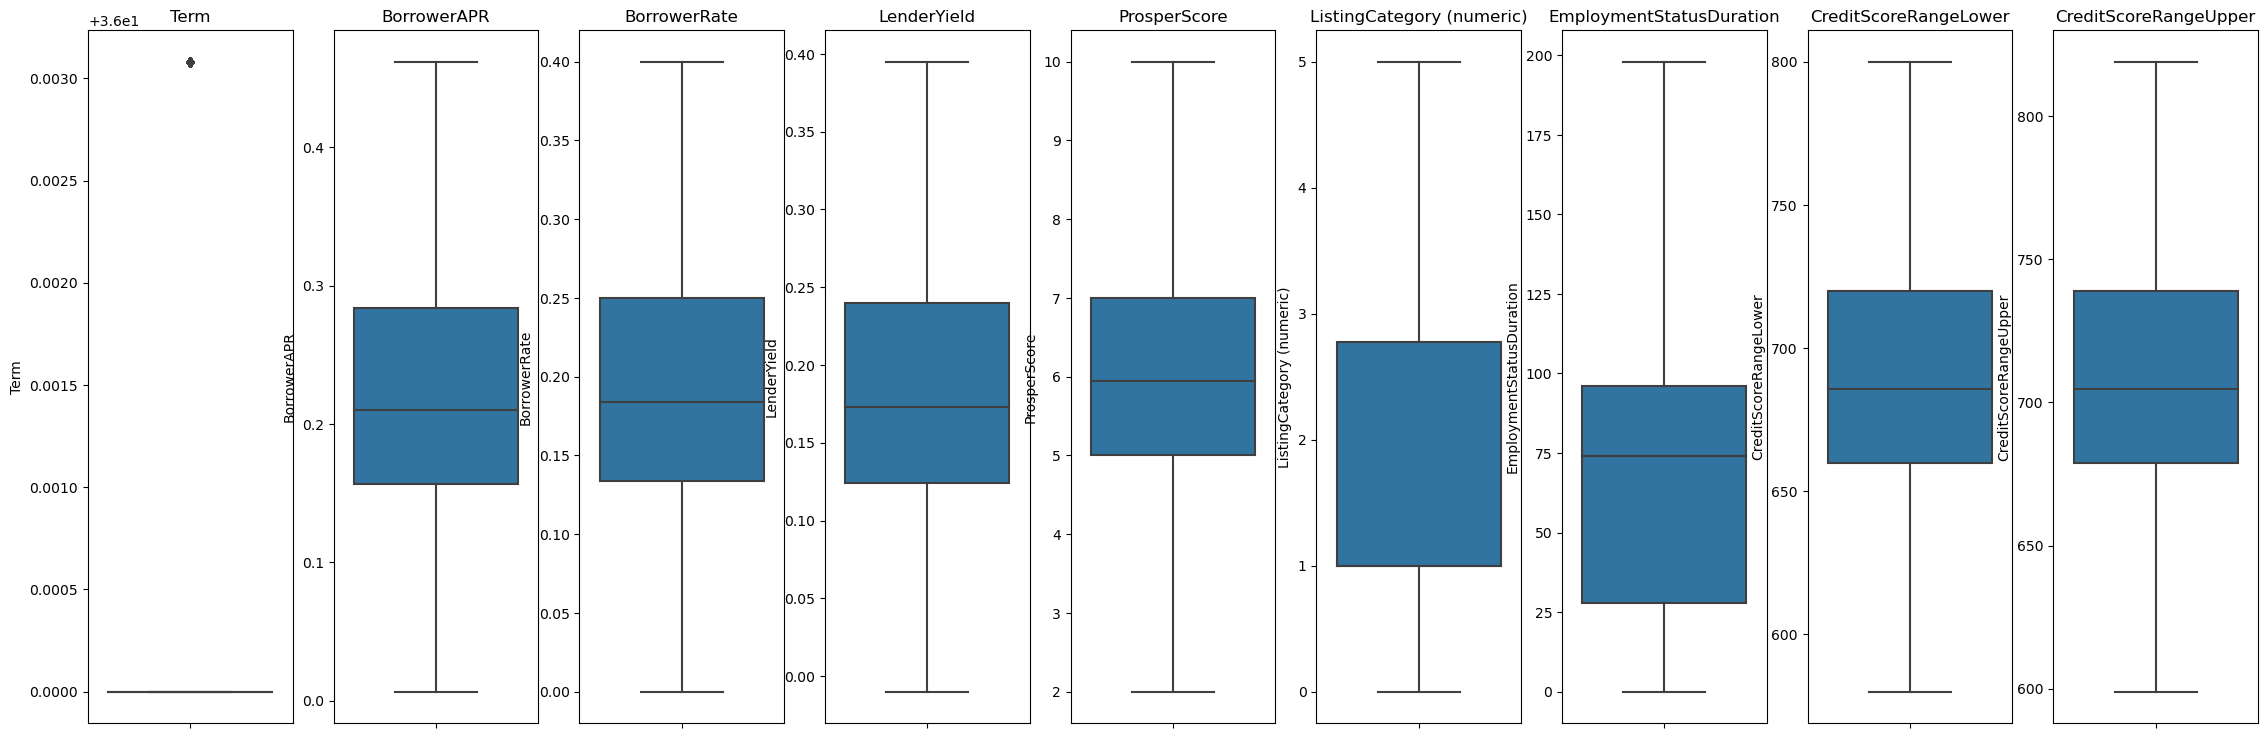

In [49]:
fig, axes = plt.subplots(1, 9, figsize=(28, 9))  

for i, col in enumerate(X.columns[:9]):
    sns.boxplot(data=loan_df, y=col, ax=axes[i])
    axes[i].set_title(col)

plt.show()

## Data Encoding

In [50]:
loan_df['ClosedDate'] = loan_df['ClosedDate'].fillna(0).apply(lambda x: 1 if x != 'Not Closed' else 0)
loan_df.head()

,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,36.0,Completed,1,0.16516,0.1580,0.1380,C,5.950067,0.000000,CO,...,-43.426751,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,63.746711
1,36.0,Current,0,0.12016,0.0920,0.0820,A,7.000000,2.000000,CO,...,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000
2,36.0,Completed,1,0.28269,0.2750,0.2400,C,5.950067,0.000000,GA,...,-24.200000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.000000
3,36.0,Current,0,0.12528,0.0974,0.0874,A,9.000000,2.774209,GA,...,-108.010000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.000000
4,36.0,Current,0,0.24614,0.2085,0.1985,D,4.000000,2.000000,MN,...,-60.270000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.000000


In [51]:
le=LabelEncoder()
cols=['ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine','DateCreditPulled',
      'IncomeRange','LoanOriginationQuarter','IsBorrowerHomeowner','CurrentlyInGroup','IncomeVerifiable']
loan_df[cols]=loan_df[cols].apply(LabelEncoder().fit_transform)
loan_df.head()

,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,36.0,Completed,1,0.16516,0.1580,0.1380,3,5.950067,0.000000,5,...,-43.426751,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,63.746711
1,36.0,Current,0,0.12016,0.0920,0.0820,0,7.000000,2.000000,5,...,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000
2,36.0,Completed,1,0.28269,0.2750,0.2400,3,5.950067,0.000000,10,...,-24.200000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.000000
3,36.0,Current,0,0.12528,0.0974,0.0874,0,9.000000,2.774209,10,...,-108.010000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.000000
4,36.0,Current,0,0.24614,0.2085,0.1985,4,4.000000,2.000000,23,...,-60.270000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.000000


In [52]:
loan_df = loan_df[loan_df["LoanStatus"] != "Current"]

# Displaying the value counts of the "LoanStatus" column after the filtering
print(loan_df["LoanStatus"].value_counts())


Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64


In [53]:
loan_df["LoanStatus"] = (loan_df["LoanStatus"] == "Completed").astype(int)
loan_df["LoanStatus"][:10]

0     1
2     1
11    1
12    0
15    0
17    0
21    1
23    0
26    1
27    1
Name: LoanStatus, dtype: int32